# OATS

In [26]:
import pandas as pd

# Define the relative path to the CSV file
file_path = "../../../cleaned_data/questionnaire_df.csv"

questionnaire_df = pd.read_csv(file_path)

# Filter columns that contain "PERSONAL" or "SEQ" in their names
filtered_columns = [col for col in questionnaire_df.columns if "Controller" in col or "OATS" in col]

# Create a new dataframe with the filtered columns
filtered_df = questionnaire_df[filtered_columns]

# Display the new dataframe
filtered_df.head()

PERSONAL_Controller being tested?  \
0                            Chiron   
1                            Chiron   
2                            Chiron   
3                            Chiron   
4                            Chiron   

   RW-WITH-VR_OATS1: The training prepared me to properly interact with the system.  \
0                                                5.0                                  
1                                                5.0                                  
2                                                2.0                                  
3                                                3.0                                  
4                                                6.0                                  

   RW-WITH-VR_OATS2: The simulation training prepared me to easily use the system to accomplish my mission.  \
0                                                4.0                                                          
1                                                5.0                                                          
2                                                2.0                                                          
3                                                3.0                                                          
4                                                5.0                                                          

   RW-WITH-VR_OATS3: The simulation training accurately portrayed the operations in the field.  \
0                                                6.0                                             
1                                                5.0                                             
2                                                3.0                                             
3                                                5.0                                             
4                                                4.0                                             

   RW-WITH-VR_OATS4: The simulation training adequately covered all important ways I interact with the system.  \
0                                                7.0                                                             
1                                                7.0                                                             
2                                                3.0                                                             
3                                                5.0                                                             
4                                                6.0                                                             

   RW-NO-VR_OATS1: The training prepared me to properly interact with the system..1  \
0                                                  4                                  
1                                                  6                                  
2                                                  3                                  
3                                                  4                                  
4                                                  5                                  

   RW-NO-VR_OATS2: The simulation training prepared me to easily use the system to accomplish my mission..1  \
0                                                  3                                                          
1                                                  6                                                          
2                                                  2                                                          
3                                                  3                                                          
4                                                  7                                                          

   RW-NO-VR_OATS3: The simulation training accurately portrayed the operations in the field..1  \
0              

In [27]:
import pandas as pd

# Extract relevant columns
selected_columns = filtered_df.iloc[:, :9]  # Assuming the first 9 columns are relevant

# Rename columns as per the specified format
selected_columns.columns = [
    "Controller",
    "RW-WITH-VR-1",
    "RW-WITH-VR-2",
    "RW-WITH-VR-3",
    "RW-WITH-VR-4",
    "RW-NO-VR-1",
    "RW-NO-VR-2",
    "RW-NO-VR-3",
    "RW-NO-VR-4"
]

selected_columns["Controller"] = selected_columns["Controller"].replace("Chiron", "SBC")
selected_columns.to_csv("oats.csv", index=False)
selected_columns

Controller  RW-WITH-VR-1  RW-WITH-VR-2  RW-WITH-VR-3  RW-WITH-VR-4  \
0         SBC           5.0           4.0           6.0           7.0   
1         SBC           5.0           5.0           5.0           7.0   
2         SBC           2.0           2.0           3.0           3.0   
3         SBC           3.0           3.0           5.0           5.0   
4         SBC           6.0           5.0           4.0           6.0   
5         SBC           6.0           6.0           4.0           3.0   
6         SBC           7.0           2.0           3.0           4.0   
7         SBC           3.0           1.0           5.0           7.0   
8         SBC           7.0           7.0           5.0           5.0   
9         WBC           5.0           5.0           5.0           5.0   
10        WBC           4.0           5.0           6.0           6.0   
11        WBC           2.0           2.0           2.0           2.0   
12        WBC           6.0           6.0           4.0           4.0   
13        WBC           5.0           6.0           6.0           6.0   
14        WBC           6.0           6.0           3.0           4.0   
15        WBC           5.0           6.0           6.0           6.0   
16        WBC           3.0           3.0           2.0           6.0   
17        WBC           7.0           5.0           6.0           7.0   
18        WBC           5.0           4.0           3.0           6.0   
19        SBC           6.0           7.0           7.0           7.0   

    RW-NO-VR-1  RW-NO-VR-2  RW-NO-VR-3  RW-NO-VR-4  
0            4           3           4           6  
1            6           6           6           7  
2            3           2           5           2  
3            4           3           3           3  
4            5           7           6           7  
5            6           6           5           3  
6            3           5           2           5  
7            2           2           1           5  
8            6           6           7           6  
9            3           3           6           6  
10           2           4           4           6  
11           3           3           4           5  
12           6           5           5           5  
13           6           6           6           7  
14           5           4           2           3  
15           6           6           5           6  
16           2           2           1           5  
17           7           7           7           7  
18           5           5           4           5  
19           7           7           4           7

In [28]:
oats_df = selected_columns
# Group by 'Controller' and compute the mean for each column
controller_means = oats_df.groupby('Controller').transform(lambda x: x.fillna(x.mean()))

# Fill missing values in the original dataframe
oats_df.update(controller_means)

oats_df.to_csv("oats.csv", index=False)

In [24]:
import pandas as pd
import numpy as np


# Identify relevant columns for each item based on naming conventions
item1_with_vr = [col for col in oats_df.columns if "WITH-VR" in col and col.endswith("-1")]
item2_with_vr = [col for col in oats_df.columns if "WITH-VR" in col and col.endswith("-2")]
item3_with_vr = [col for col in oats_df.columns if "WITH-VR" in col and col.endswith("-3")]
item4_with_vr = [col for col in oats_df.columns if "WITH-VR" in col and col.endswith("-4")]

item1_no_vr = [col for col in oats_df.columns if "NO-VR" in col and col.endswith("-1")]
item2_no_vr = [col for col in oats_df.columns if "NO-VR" in col and col.endswith("-2")]
item3_no_vr = [col for col in oats_df.columns if "NO-VR" in col and col.endswith("-3")]
item4_no_vr = [col for col in oats_df.columns if "NO-VR" in col and col.endswith("-4")]

# Compute Relevance, Efficacy, and Training Quality separately for With VR and Without VR
oats_df["Relevance_With_VR"] = (oats_df[item1_with_vr].mean(axis=1) + oats_df[item2_with_vr].mean(axis=1)) / 2
oats_df["Efficacy_With_VR"] = (oats_df[item3_with_vr].mean(axis=1) + oats_df[item4_with_vr].mean(axis=1)) / 2
oats_df["TrainingQuality_With_VR"] = ((oats_df["Relevance_With_VR"] * 2) + (oats_df["Efficacy_With_VR"] * 2)) / 4


oats_df["Relevance_No_VR"] = (oats_df[item1_no_vr].mean(axis=1) + oats_df[item2_no_vr].mean(axis=1)) / 2
oats_df["Efficacy_No_VR"] = (oats_df[item3_no_vr].mean(axis=1) + oats_df[item4_no_vr].mean(axis=1)) / 2
oats_df["TrainingQuality_No_VR"] = ((oats_df["Relevance_No_VR"] * 2) + (oats_df["Efficacy_No_VR"] * 2)) / 4

# Compute mean and standard deviation grouped by Controller
summary_stats_with_vr = oats_df.groupby("Controller")[["Relevance_With_VR", "Efficacy_With_VR", "TrainingQuality_With_VR"]].agg(["mean", "std"])
summary_stats_no_vr = oats_df.groupby("Controller")[["Relevance_No_VR", "Efficacy_No_VR", "TrainingQuality_No_VR"]].agg(["mean", "std"])

# Flatten MultiIndex columns for readability
summary_stats_with_vr.columns = [f"{col[0]}_{col[1]}" for col in summary_stats_with_vr.columns]
summary_stats_no_vr.columns = [f"{col[0]}_{col[1]}" for col in summary_stats_no_vr.columns]

# Format the table with mean ± standard deviation notation
summary_stats_with_vr_formatted = summary_stats_with_vr.applymap(lambda x: f"{x:.2f}")
summary_stats_no_vr_formatted = summary_stats_no_vr.applymap(lambda x: f"{x:.2f}")

# Convert to LaTeX format
latex_table_with_vr = summary_stats_with_vr_formatted.to_latex()
latex_table_no_vr = summary_stats_no_vr_formatted.to_latex()

# Save the LaTeX tables to files
with open("training_evaluation_metrics_with_vr.tex", "w") as f:
    f.write(latex_table_with_vr)

with open("training_evaluation_metrics_no_vr.tex", "w") as f:
    f.write(latex_table_no_vr)

# Display the LaTeX formatted tables
print("With VR Table:\n", latex_table_with_vr)
print("No VR Table:\n", latex_table_no_vr)


With VR Table:
 \begin{tabular}{lllllll}
\toprule
 & Relevance_With_VR_mean & Relevance_With_VR_std & Efficacy_With_VR_mean & Efficacy_With_VR_std & TrainingQuality_With_VR_mean & TrainingQuality_With_VR_std \\
Controller &  &  &  &  &  &  \\
\midrule
SBC & 4.60 & 1.78 & 5.05 & 1.36 & 4.83 & 1.23 \\
WBC & 4.80 & 1.36 & 4.75 & 1.42 & 4.78 & 1.24 \\
\bottomrule
\end{tabular}

No VR Table:
 \begin{tabular}{lllllll}
\toprule
 & Relevance_No_VR_mean & Relevance_No_VR_std & Efficacy_No_VR_mean & Efficacy_No_VR_std & TrainingQuality_No_VR_mean & TrainingQuality_No_VR_std \\
Controller &  &  &  &  &  &  \\
\midrule
SBC & 4.65 & 1.75 & 4.70 & 1.48 & 4.67 & 1.51 \\
WBC & 4.50 & 1.67 & 4.95 & 1.42 & 4.72 & 1.37 \\
\bottomrule
\end{tabular}



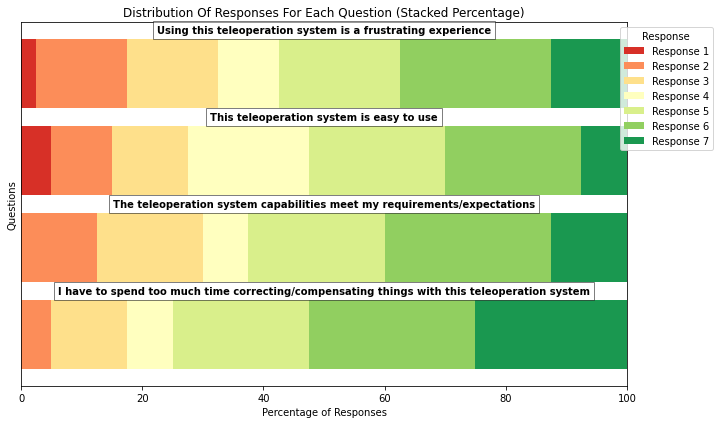

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define mapping of questions to their descriptions
question_texts = {
    "1": "The teleoperation system capabilities meet my requirements/expectations",
    "2": "Using this teleoperation system is a frustrating experience",
    "3": "This teleoperation system is easy to use",
    "4": "I have to spend too much time correcting/compensating things with this teleoperation system"
}

# Extract relevant columns for Likert-scale responses (1 to 7)
likert_columns = [col for col in oats_df.columns if any(col.endswith(f"-{i}") for i in range(1, 8))]

# Melt the dataset into long format for easier plotting
long_df = oats_df.melt(value_vars=likert_columns, var_name="Question", value_name="Response")

# Extract question numbers and response values
long_df["Question"] = long_df["Question"].str.extract(r'(\d+)')  # Extract question numbers
long_df["Response"] = long_df["Response"].astype(int)  # Ensure responses are integers

# Map question numbers to their full descriptions
long_df["Question"] = long_df["Question"].map(question_texts)

# Count responses for each question and normalize to percentage
response_counts = long_df.groupby(["Question", "Response"]).size().reset_index(name="Count")
response_counts["Percentage"] = response_counts.groupby("Question")["Count"].transform(lambda x: x / x.sum() * 100)

# Pivot the data to create a stacked bar chart format
stacked_data = response_counts.pivot(index="Question", columns="Response", values="Percentage").fillna(0)

# Define the colors for each response category
likert_palette = {
    1: "#D73027",  # Strongly Disagree - Dark Red
    2: "#FC8D59",  # Disagree - Light Red
    3: "#FEE08B",  # Slightly Disagree - Yellow
    4: "#FFFFBF",  # Neutral - Light Yellow
    5: "#D9EF8B",  # Slightly Agree - Light Green
    6: "#91CF60",  # Agree - Green
    7: "#1A9850"   # Strongly Agree - Dark Green
}

# Create the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize left position for stacking bars
left = [0] * len(stacked_data)

# Plot each response category as a stacked bar
for response in range(1, 8):  # Responses from 1 to 7
    ax.barh(stacked_data.index, stacked_data[response], color=likert_palette[response], label=f"Response {response}", left=left)
    left += stacked_data[response]  # Shift left position for next category
    


# Add question text on top of each bar
for i, question in enumerate(stacked_data.index):
    ax.text(50, i+0.5, question, ha="center", va="center", fontsize=10, fontweight="bold", bbox=dict(facecolor='white', alpha=0.5))

# Customize the plot
ax.set_xlim(0, 100)  # Ensure percentages sum to 100% per question
ax.set_xlabel("Percentage of Responses")
ax.set_ylabel("Questions")  # Set y-axis label to just "Questions"
ax.set_yticks([])  # Remove y-axis labels
ax.set_title("Distribution Of Responses For Each Question (Stacked Percentage)")
ax.legend(title="Response", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


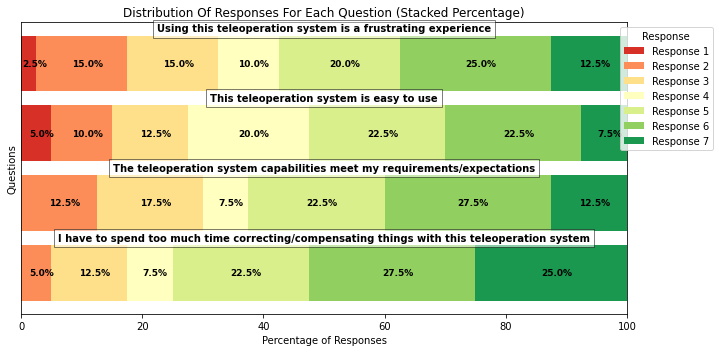

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define mapping of questions to their descriptions
question_texts = {
    "1": "The teleoperation system capabilities meet my requirements/expectations",
    "2": "Using this teleoperation system is a frustrating experience",
    "3": "This teleoperation system is easy to use",
    "4": "I have to spend too much time correcting/compensating things with this teleoperation system"
}

# Extract relevant columns for Likert-scale responses (1 to 7)
likert_columns = [col for col in oats_df.columns if any(col.endswith(f"-{i}") for i in range(1, 8))]

# Melt the dataset into long format for easier plotting
long_df = oats_df.melt(value_vars=likert_columns, var_name="Question", value_name="Response")

# Extract question numbers and response values
long_df["Question"] = long_df["Question"].str.extract(r'(\d+)')  # Extract question numbers
long_df["Response"] = long_df["Response"].astype(int)  # Ensure responses are integers

# Map question numbers to their full descriptions
long_df["Question"] = long_df["Question"].map(question_texts)

# Count responses for each question and normalize to percentage
response_counts = long_df.groupby(["Question", "Response"]).size().reset_index(name="Count")
response_counts["Percentage"] = response_counts.groupby("Question")["Count"].transform(lambda x: x / x.sum() * 100)

# Pivot the data to create a stacked bar chart format
stacked_data = response_counts.pivot(index="Question", columns="Response", values="Percentage").fillna(0)

# Define the colors for each response category
likert_palette = {
    1: "#D73027",  # Strongly Disagree - Dark Red
    2: "#FC8D59",  # Disagree - Light Red
    3: "#FEE08B",  # Slightly Disagree - Yellow
    4: "#FFFFBF",  # Neutral - Light Yellow
    5: "#D9EF8B",  # Slightly Agree - Light Green
    6: "#91CF60",  # Agree - Green
    7: "#1A9850"   # Strongly Agree - Dark Green
}

# Create the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Initialize left position for stacking bars
left = [0] * len(stacked_data)

# Plot each response category as a stacked bar
for response in range(1, 8):  # Responses from 1 to 7
    bars = ax.barh(stacked_data.index, stacked_data[response], color=likert_palette[response], label=f"Response {response}", left=left)
    left += stacked_data[response]  # Shift left position for next category
    
    # Add percentage text on each colored segment
    for bar, percentage in zip(bars, stacked_data[response]):
        if percentage > 0:
            ax.text(bar.get_x() + bar.get_width() / 2 + 0.9, bar.get_y() + bar.get_height() / 2, f"{percentage:.1f}%", 
                    ha="center", va="center", fontsize=9, color="black", fontweight="bold")

# Add question text on top of each bar
for i, question in enumerate(stacked_data.index):
    ax.text(50, i+0.5, question, ha="center", va="center", fontsize=10, fontweight="bold", bbox=dict(facecolor='white', alpha=0.5))

# Customize the plot
ax.set_xlim(0, 100)  # Ensure percentages sum to 100% per question
ax.set_xlabel("Percentage of Responses")
ax.set_ylabel("Questions")  # Set y-axis label to just "Questions"
ax.set_yticks([])  # Remove y-axis labels
ax.set_title("Distribution Of Responses For Each Question (Stacked Percentage)")
ax.legend(title="Response", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


In [67]:
long_df

Controller                                           Question  Response  \
0          SBC  The teleoperation system capabilities meet my ...         5   
1          SBC  The teleoperation system capabilities meet my ...         5   
2          SBC  The teleoperation system capabilities meet my ...         2   
3          SBC  The teleoperation system capabilities meet my ...         3   
4          SBC  The teleoperation system capabilities meet my ...         6   
..         ...                                                ...       ...   
155        WBC  I have to spend too much time correcting/compe...         6   
156        WBC  I have to spend too much time correcting/compe...         5   
157        WBC  I have to spend too much time correcting/compe...         7   
158        WBC  I have to spend too much time correcting/compe...         5   
159        SBC  I have to spend too much time correcting/compe...         7   

       Modality       Condition  
0       With VR     SBC With VR  
1       With VR     SBC With VR  
2       With VR     SBC With VR  
3       With VR     SBC With VR  
4       With VR     SBC With VR  
..          ...             ...  
155  Without VR  WBC Without VR  
156  Without VR  WBC Without VR  
157  Without VR  WBC Without VR  
158  Without VR  WBC Without VR  
159  Without VR  SBC Without VR  

[160 rows x 5 columns]

In [68]:
oats_df

Controller  RW-WITH-VR-1  RW-WITH-VR-2  RW-WITH-VR-3  RW-WITH-VR-4  \
0         SBC           5.0           4.0           6.0           7.0   
1         SBC           5.0           5.0           5.0           7.0   
2         SBC           2.0           2.0           3.0           3.0   
3         SBC           3.0           3.0           5.0           5.0   
4         SBC           6.0           5.0           4.0           6.0   
5         SBC           6.0           6.0           4.0           3.0   
6         SBC           7.0           2.0           3.0           4.0   
7         SBC           3.0           1.0           5.0           7.0   
8         SBC           7.0           7.0           5.0           5.0   
9         WBC           5.0           5.0           5.0           5.0   
10        WBC           4.0           5.0           6.0           6.0   
11        WBC           2.0           2.0           2.0           2.0   
12        WBC           6.0           6.0           4.0           4.0   
13        WBC           5.0           6.0           6.0           6.0   
14        WBC           6.0           6.0           3.0           4.0   
15        WBC           5.0           6.0           6.0           6.0   
16        WBC           3.0           3.0           2.0           6.0   
17        WBC           7.0           5.0           6.0           7.0   
18        WBC           5.0           4.0           3.0           6.0   
19        SBC           6.0           7.0           7.0           7.0   

    RW-NO-VR-1  RW-NO-VR-2  RW-NO-VR-3  RW-NO-VR-4  
0            4           3           4           6  
1            6           6           6           7  
2            3           2           5           2  
3            4           3           3           3  
4            5           7           6           7  
5            6           6           5           3  
6            3           5           2           5  
7            2           2           1           5  
8            6           6           7           6  
9            3           3           6           6  
10           2           4           4           6  
11           3           3           4           5  
12           6           5           5           5  
13           6           6           6           7  
14           5           4           2           3  
15           6           6           5           6  
16           2           2           1           5  
17           7           7           7           7  
18           5           5           4           5  
19           7           7           4           7

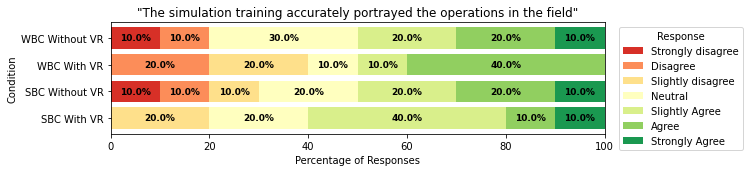

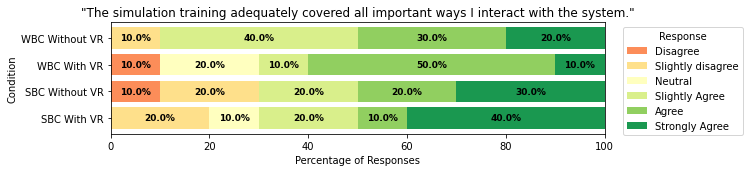

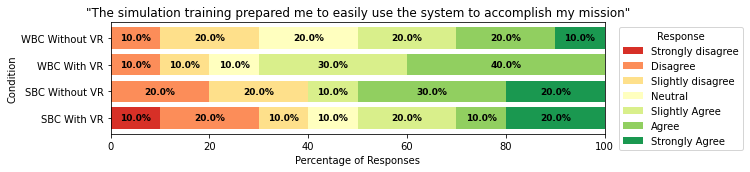

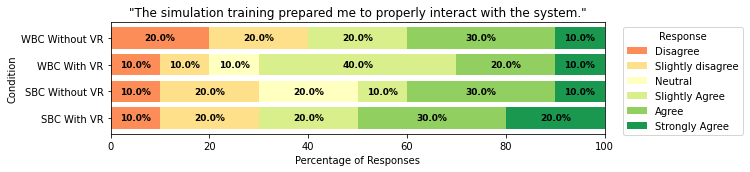

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define mapping of questions to their descriptions
question_texts = {
    "1": '"The simulation training prepared me to properly interact with the system."',
    "2": '"The simulation training prepared me to easily use the system to accomplish my mission"',
    "3": '"The simulation training accurately portrayed the operations in the field"',
    "4": '"The simulation training adequately covered all important ways I interact with the system."'
}

# Extract relevant columns for Likert-scale responses (1 to 7)
likert_columns = [col for col in oats_df.columns if any(col.endswith(f"-{i}") for i in range(1, 8))]

# Melt the dataset into long format for easier plotting
long_df = oats_df.melt(id_vars=["Controller"], value_vars=likert_columns, var_name="Question", value_name="Response")

# Extract modality information from column names
long_df["Modality"] = long_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")

# Extract question numbers
long_df["Question"] = long_df["Question"].str.extract(r'(\d+)')  # Extract question numbers
long_df["Response"] = long_df["Response"].astype(int)  # Ensure responses are integers

# Map question numbers to their full descriptions
long_df["Question"] = long_df["Question"].map(question_texts)

# Define condition labels
long_df["Condition"] = long_df["Controller"] + " " + long_df["Modality"]

# Count responses for each question and condition, then normalize to percentage
response_counts = long_df.groupby(["Question", "Condition", "Response"]).size().reset_index(name="Count")
response_counts["Percentage"] = response_counts.groupby(["Question", "Condition"])['Count'].transform(lambda x: x / x.sum() * 100)

# Ensure response categories are numeric
response_counts["Response"] = response_counts["Response"].astype(int)

# Define the colors for each response category
likert_palette = {
    1: "#D73027",  # Strongly Disagree - Dark Red
    2: "#FC8D59",  # Disagree - Light Red
    3: "#FEE08B",  # Slightly Disagree - Yellow
    4: "#FFFFBF",  # Neutral - Light Yellow
    5: "#D9EF8B",  # Slightly Agree - Light Green
    6: "#91CF60",  # Agree - Green
    7: "#1A9850"   # Strongly Agree - Dark Green
}

# Create individual plots for each question
response_labels = ["Strongly disagree", "Disagree", "Slightly disagree", "Neutral", "Slightly Agree", "Agree", "Strongly Agree"]
num_plot = 1
for question, data in response_counts.groupby("Question"):
    
    # Pivot data for stacked bar chart format
    stacked_data = data.pivot(index="Condition", columns="Response", values="Percentage").fillna(0)
    stacked_data.columns = stacked_data.columns.astype(int)  # Ensure numeric column labels
    stacked_data = stacked_data.sort_index(axis=1)  # Sort responses in ascending order
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(11, 2.5))
    
    # Initialize left position for stacking bars
    left = [0] * len(stacked_data)
    
    # Plot each response category as a stacked bar
    for response in range(1, 8):  # Responses from 1 to 7
        if response in stacked_data.columns:
            bars = ax.barh(stacked_data.index, stacked_data[response], color=likert_palette[response], label=response_labels[response-1], left=left)
            left += stacked_data[response]  # Shift left position for next category
            
            # Add percentage text on each colored segment
            for bar, percentage in zip(bars, stacked_data[response]):
                if percentage > 0:
                    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"{percentage:.1f}%", 
                            ha="center", va="center", fontsize=9, color="black", fontweight="bold")
    
    # Customize the plot
    ax.set_xlim(0, 100)  # Ensure percentages sum to 100% per condition
    ax.set_xlabel("Percentage of Responses")
    ax.set_ylabel("Condition")  # Display different conditions on the y-axis
    ax.set_title(f"{question}")
    ax.legend(title="Response", loc="upper right", bbox_to_anchor=(1.29, 1))
    
    plt.tight_layout()
    output_path = f"oats_plots_{num_plot}.pdf"  # Specify your desired file path
    plt.savefig(output_path, format='pdf')
    plt.show()
    num_plot += 1


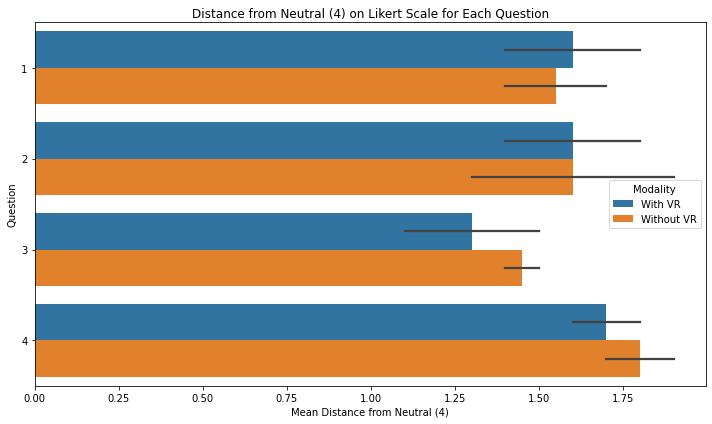

In [106]:
# Define relevant columns for Likert responses (WITH VR and NO VR)
with_vr_columns = ["RW-WITH-VR-1", "RW-WITH-VR-2", "RW-WITH-VR-3", "RW-WITH-VR-4"]
no_vr_columns = ["RW-NO-VR-1", "RW-NO-VR-2", "RW-NO-VR-3", "RW-NO-VR-4"]

# Compute absolute differences from neutral (4) for each response
for col in with_vr_columns + no_vr_columns:
    oats_df[f"{col}_Diff"] = abs(oats_df[col] - 4)

# Compute mean differences per question across conditions
summary_diff = oats_df.groupby("Controller")[[f"{col}_Diff" for col in with_vr_columns + no_vr_columns]].mean()

# Convert to long format for Seaborn
plot_df = summary_diff.reset_index().melt(id_vars=["Controller"], var_name="Question", value_name="Distance from Neutral")

# Extract Modality information from column names
plot_df["Modality"] = plot_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")
plot_df["Question"] = plot_df["Question"].str.extract(r'(\d+)')  # Extract question numbers

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y="Question", x="Distance from Neutral", hue="Modality", data=plot_df, orient="h", dodge=True)

# Customize plot
plt.title("Distance from Neutral (4) on Likert Scale for Each Question")
plt.xlabel("Mean Distance from Neutral (4)")
plt.ylabel("Question")
plt.legend(title="Modality")

plt.tight_layout()
plt.show()


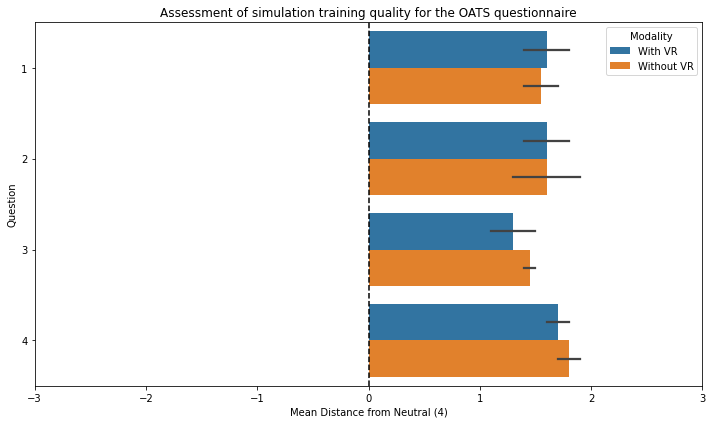

In [120]:
# Define relevant columns for Likert responses (WITH VR and NO VR)
with_vr_columns = ["RW-WITH-VR-1", "RW-WITH-VR-2", "RW-WITH-VR-3", "RW-WITH-VR-4"]
no_vr_columns = ["RW-NO-VR-1", "RW-NO-VR-2", "RW-NO-VR-3", "RW-NO-VR-4"]

# Compute absolute differences from neutral (4) for each response
for col in with_vr_columns + no_vr_columns:
    oats_df[f"{col}_Diff"] = abs(oats_df[col] - 4)

# Compute mean differences per question across conditions
summary_diff = oats_df.groupby("Controller")[[f"{col}_Diff" for col in with_vr_columns + no_vr_columns]].mean()

# Convert to long format for Seaborn
plot_df = summary_diff.reset_index().melt(id_vars=["Controller"], var_name="Question", value_name="Distance from Neutral")

# Extract Modality information from column names
plot_df["Modality"] = plot_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")
plot_df["Question"] = plot_df["Question"].str.extract(r'(\d+)')  # Extract question numbers

# Adjust the x-axis to include the full possible range (-3 to +3)
plt.figure(figsize=(10, 6))
ax = sns.barplot(y="Question", x="Distance from Neutral", hue="Modality", data=plot_df, orient="h", dodge=True)

# Customize plot
plt.title("Assessment of simulation training quality for the OATS questionnaire")
plt.xlabel("Mean Distance from Neutral (4)")
plt.ylabel("Question")
plt.xlim(-3, 3)  # Extend x-axis from -3 to +3 to include full range
plt.axvline(0, color='black', linestyle='--')  # Add reference line at neutral point
plt.legend(title="Modality")

plt.tight_layout()
plt.show()


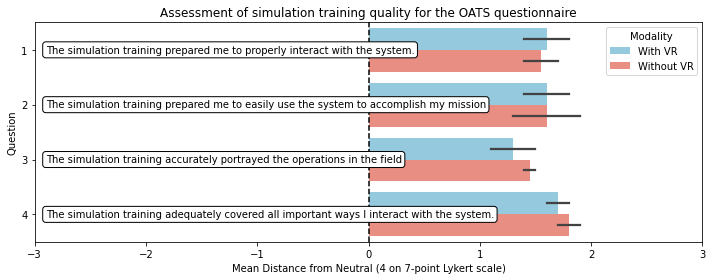

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define relevant columns for Likert responses (WITH VR and NO VR)
with_vr_columns = ["RW-WITH-VR-1", "RW-WITH-VR-2", "RW-WITH-VR-3", "RW-WITH-VR-4"]
no_vr_columns = ["RW-NO-VR-1", "RW-NO-VR-2", "RW-NO-VR-3", "RW-NO-VR-4"]

# Compute absolute differences from neutral (4) for each response
for col in with_vr_columns + no_vr_columns:
    oats_df[f"{col}_Diff"] = abs(oats_df[col] - 4)

# Compute mean differences per question across conditions
summary_diff = oats_df.groupby("Controller")[[f"{col}_Diff" for col in with_vr_columns + no_vr_columns]].mean()

# Convert to long format for Seaborn
plot_df = summary_diff.reset_index().melt(id_vars=["Controller"], var_name="Question", value_name="Distance from Neutral")

# Extract Modality information from column names
plot_df["Modality"] = plot_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")
plot_df["Question"] = plot_df["Question"].str.extract(r'(\d+)')  # Extract question numbers

# Define mapping of questions to their descriptions
question_texts = {
    "1": "The simulation training prepared me to properly interact with the system.",
    "2": "The simulation training prepared me to easily use the system to accomplish my mission",
    "3": "The simulation training accurately portrayed the operations in the field",
    "4": "The simulation training adequately covered all important ways I interact with the system."
}

# Map question numbers to their full descriptions
plot_df["Question Text"] = plot_df["Question"].map(question_texts)

# Keep only one entry per question for labeling
unique_questions = plot_df.drop_duplicates(subset=["Question"])

# Adjust the x-axis to include the full possible range (-3 to +3)
plt.figure(figsize=(10, 4))
ax = sns.barplot(y="Question", x="Distance from Neutral", hue="Modality", data=plot_df, orient="h", dodge=True, palette={"With VR": "skyblue", "Without VR": "salmon"})

# Add question text above each bar with an offset
for i, row in unique_questions.iterrows():
    plt.text(
        x=-2.9, y=0.5*i,  # Position text at the right side of the bars
        s=row["Question Text"], ha="left", va="center", fontsize=10, color="black",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    

# Customize plot
plt.title("Assessment of simulation training quality for the OATS questionnaire")
plt.xlabel("Mean Distance from Neutral (4 on 7-point Lykert scale)")
plt.ylabel("Question")
plt.xlim(-3, 3)  # Extend x-axis from -3 to +3 to include full range
plt.axvline(0, color='black', linestyle='--')  # Add reference line at neutral point
plt.legend(title="Modality")

plt.tight_layout()
plt.show()


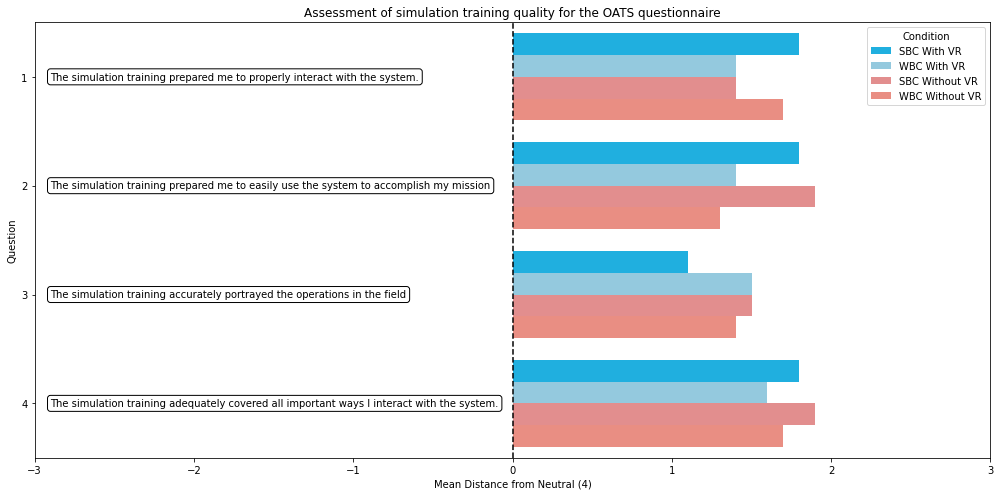

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define relevant columns for Likert responses (WITH VR and NO VR)
with_vr_columns = ["RW-WITH-VR-1", "RW-WITH-VR-2", "RW-WITH-VR-3", "RW-WITH-VR-4"]
no_vr_columns = ["RW-NO-VR-1", "RW-NO-VR-2", "RW-NO-VR-3", "RW-NO-VR-4"]

# Compute absolute differences from neutral (4) for each response
for col in with_vr_columns + no_vr_columns:
    oats_df[f"{col}_Diff"] = abs(oats_df[col] - 4)

# Compute mean differences per question across conditions
summary_diff = oats_df.groupby(["Controller"])[[f"{col}_Diff" for col in with_vr_columns + no_vr_columns]].mean()

# Convert to long format for Seaborn
plot_df = summary_diff.reset_index().melt(id_vars=["Controller"], var_name="Question", value_name="Distance from Neutral")

# Extract Modality and Controller information
plot_df["Modality"] = plot_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")
plot_df["Question"] = plot_df["Question"].str.extract(r'(\d+)')  # Extract question numbers
plot_df["Condition"] = plot_df["Controller"] + " " + plot_df["Modality"]

# Define mapping of questions to their descriptions
question_texts = {
    "1": "The simulation training prepared me to properly interact with the system.",
    "2": "The simulation training prepared me to easily use the system to accomplish my mission",
    "3": "The simulation training accurately portrayed the operations in the field",
    "4": "The simulation training adequately covered all important ways I interact with the system."
}

# Map question numbers to their full descriptions
plot_df["Question Text"] = plot_df["Question"].map(question_texts)

# Keep only one entry per question for labeling
unique_questions = plot_df.drop_duplicates(subset=["Question"])

# Define custom color palette
palette = {
    "WBC With VR": "skyblue",
    "SBC With VR": "deepskyblue",
    "WBC Without VR": "salmon",
    "SBC Without VR": "lightcoral"
}

# Adjust the x-axis to include the full possible range (-3 to +3)
plt.figure(figsize=(14, 7))
ax = sns.barplot(y="Question", x="Distance from Neutral", hue="Condition", data=plot_df, orient="h", dodge=True, palette=palette)

# Add question text above each bar with an offset and a bounding box
for i, row in unique_questions.iterrows():
    plt.text(
        x=-2.9, y=0.5*i,  # Position text at the right side of the bars
        s=row["Question Text"], ha="left", va="center", fontsize=10, color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

# Customize plot
plt.title("Assessment of simulation training quality for the OATS questionnaire")
plt.xlabel("Mean Distance from Neutral (4)")
plt.ylabel("Question")
plt.xlim(-3, 3)  # Extend x-axis from -3 to +3 to include full range
plt.axvline(0, color='black', linestyle='--')  # Add reference line at neutral point
plt.legend(title="Condition")

plt.tight_layout()
plt.show()

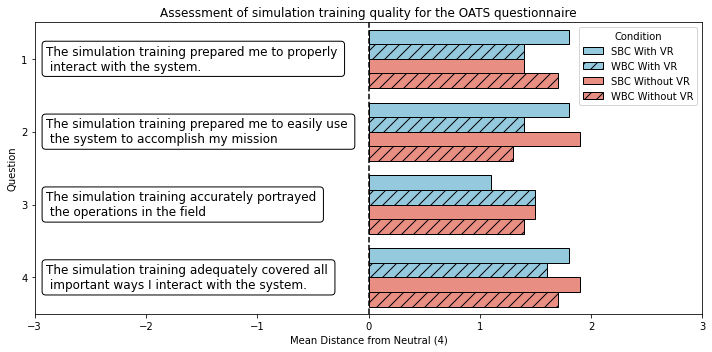

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Define relevant columns for Likert responses (WITH VR and NO VR)
with_vr_columns = ["RW-WITH-VR-1", "RW-WITH-VR-2", "RW-WITH-VR-3", "RW-WITH-VR-4"]
no_vr_columns = ["RW-NO-VR-1", "RW-NO-VR-2", "RW-NO-VR-3", "RW-NO-VR-4"]

# Compute absolute differences from neutral (4) for each response
for col in with_vr_columns + no_vr_columns:
    oats_df[f"{col}_Diff"] = abs(oats_df[col] - 4)

# Compute mean differences per question across conditions
summary_diff = oats_df.groupby(["Controller"])[[f"{col}_Diff" for col in with_vr_columns + no_vr_columns]].mean()

# Convert to long format for Seaborn
plot_df = summary_diff.reset_index().melt(id_vars=["Controller"], var_name="Question", value_name="Distance from Neutral")

# Extract Modality and Controller information
plot_df["Modality"] = plot_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")
plot_df["Question"] = plot_df["Question"].str.extract(r'(\d+)')  # Extract question numbers
plot_df["Condition"] = plot_df["Controller"] + " " + plot_df["Modality"]

# Define mapping of questions to their descriptions
question_texts = {
    "1": "The simulation training prepared me to properly \n interact with the system.",
    "2": "The simulation training prepared me to easily use \n the system to accomplish my mission",
    "3": "The simulation training accurately portrayed \n the operations in the field",
    "4": "The simulation training adequately covered all \n important ways I interact with the system."
}

# Map question numbers to their full descriptions
plot_df["Question Text"] = plot_df["Question"].map(question_texts)

# Keep only one entry per question for labeling
unique_questions = plot_df.drop_duplicates(subset=["Question"])

# Define custom color palette
palette = {
    "WBC With VR": "skyblue",
    "SBC With VR": "skyblue",
    "WBC Without VR": "salmon",
    "SBC Without VR": "salmon"
}

# Adjust the x-axis to include the full possible range (-3 to +3)
plt.figure(figsize=(10, 5))
ax = sns.barplot(y="Question", x="Distance from Neutral", hue="Condition", data=plot_df, orient="h", dodge=True, palette=palette, edgecolor='black',errorbar="se")

# Apply hatching for WBC bars
# Apply hatching for WBC bars
for i, patch in enumerate(ax.patches):
    if i in [4,5,6,7,12,13,14,15,17,19]:
        patch.set_hatch("//")

# Add question text above each bar with an offset and a bounding box
for i, row in unique_questions.iterrows():
    plt.text(
         x=-2.9, y=0.5*i,  # Position text at the right side of the bars
        s=row["Question Text"], ha="left", va="center", fontsize=12, color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

# Customize plot
plt.title("Assessment of simulation training quality for the OATS questionnaire")
plt.xlabel("Mean Distance from Neutral (4)")
plt.ylabel("Question")
plt.xlim(-3, 3)  # Extend x-axis from -3 to +3 to include full range
plt.axvline(0, color='black', linestyle='--')  # Add reference line at neutral point
plt.legend(title="Condition")

plt.tight_layout()
plt.tight_layout()
output_path = "oats_means.pdf"  # Specify your desired file path
plt.savefig(output_path, format='pdf')
plt.show()


In [155]:
plot_df

Controller Question  Distance from Neutral    Modality       Condition  \
0         SBC        1                    1.8     With VR     SBC With VR   
1         WBC        1                    1.4     With VR     WBC With VR   
2         SBC        2                    1.8     With VR     SBC With VR   
3         WBC        2                    1.4     With VR     WBC With VR   
4         SBC        3                    1.1     With VR     SBC With VR   
5         WBC        3                    1.5     With VR     WBC With VR   
6         SBC        4                    1.8     With VR     SBC With VR   
7         WBC        4                    1.6     With VR     WBC With VR   
8         SBC        1                    1.4  Without VR  SBC Without VR   
9         WBC        1                    1.7  Without VR  WBC Without VR   
10        SBC        2                    1.9  Without VR  SBC Without VR   
11        WBC        2                    1.3  Without VR  WBC Without VR   
12        SBC        3                    1.5  Without VR  SBC Without VR   
13        WBC        3                    1.4  Without VR  WBC Without VR   
14        SBC        4                    1.9  Without VR  SBC Without VR   
15        WBC        4                    1.7  Without VR  WBC Without VR   

                                        Question Text  
0   The simulation training prepared me to properl...  
1   The simulation training prepared me to properl...  
2   The simulation training prepared me to easily ...  
3   The simulation training prepared me to easily ...  
4   The simulation training accurately portrayed t...  
5   The simulation training accurately portrayed t...  
6   The simulation training adequately covered all...  
7   The simulation training adequately covered all...  
8   The simulation training prepared me to properl...  
9   The simulation training prepared me to properl...  
10  The simulation training prepared me to easily ...  
11  The simulation training prepared me to easily ...  
12  The simulation training accurately portrayed t...  
13  The simulation training accurately portrayed t...  
14  The simulation training adequately covered all...  
15  The simulation training adequately covered all...

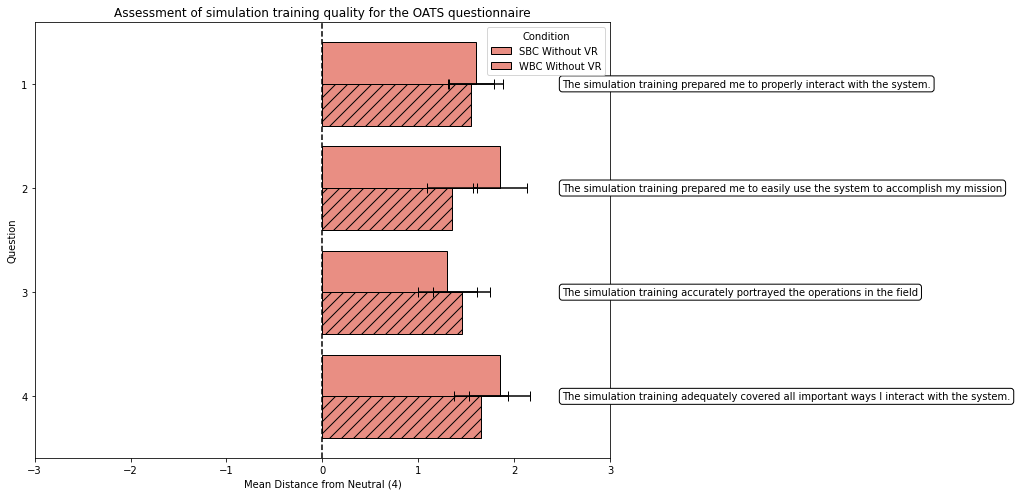

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Define relevant columns for Likert responses (WITH VR and NO VR)
with_vr_columns = ["RW-WITH-VR-1", "RW-WITH-VR-2", "RW-WITH-VR-3", "RW-WITH-VR-4"]
no_vr_columns = ["RW-NO-VR-1", "RW-NO-VR-2", "RW-NO-VR-3", "RW-NO-VR-4"]

# Compute absolute differences from neutral (4) for each response
for col in with_vr_columns + no_vr_columns:
    oats_df[f"{col}_Diff"] = abs(oats_df[col] - 4)

# Compute mean and SEM per question across conditions
summary_stats = oats_df.groupby(["Controller"])[[f"{col}_Diff" for col in with_vr_columns + no_vr_columns]].agg(['mean', 'sem'])
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]  # Flatten multi-index

# Convert to long format for Seaborn
plot_df = summary_stats.reset_index().melt(id_vars=["Controller"], var_name="Statistic", value_name="Value")

# Extract Question and Statistic type (mean or sem)
plot_df["Question"] = plot_df["Statistic"].str.extract(r'(\d+)')  # Extract question numbers
plot_df["StatType"] = plot_df["Statistic"].apply(lambda x: "SEM" if "sem" in x else "Mean")
plot_df = plot_df.pivot_table(index=["Controller", "Question"], columns="StatType", values="Value").reset_index()

# Extract Modality and Controller information
plot_df["Modality"] = plot_df["Question"].apply(lambda x: "With VR" if "WITH-VR" in x else "Without VR")
plot_df["Condition"] = plot_df["Controller"] + " " + plot_df["Modality"]

# Define mapping of questions to their descriptions
question_texts = {
    "1": "The simulation training prepared me to properly interact with the system.",
    "2": "The simulation training prepared me to easily use the system to accomplish my mission",
    "3": "The simulation training accurately portrayed the operations in the field",
    "4": "The simulation training adequately covered all important ways I interact with the system."
}

# Map question numbers to their full descriptions
plot_df["Question Text"] = plot_df["Question"].map(question_texts)

# Keep only one entry per question for labeling
unique_questions = plot_df.drop_duplicates(subset=["Question"])

# Define custom color palette
palette = {
    "WBC With VR": "skyblue",
    "SBC With VR": "skyblue",
    "WBC Without VR": "salmon",
    "SBC Without VR": "salmon"
}

# Adjust the x-axis to include the full possible range (-3 to +3)
plt.figure(figsize=(14, 7))
ax = sns.barplot(y="Question", x="Mean", hue="Condition", data=plot_df, orient="h", dodge=True, palette=palette, edgecolor='black')

# Apply hatching for WBC bars and add SEM error bars
for i, (bar, (_, row)) in enumerate(zip(ax.patches, plot_df.iterrows())):
    condition = row["Condition"]
    if "WBC" in condition:
        bar.set_hatch("//")
    plt.errorbar(
        x=row["Mean"], y=i % len(plot_df["Question"].unique()),
        xerr=row["SEM"], fmt="none", ecolor="black", capsize=5
    )

# Add question text above each bar with an offset and a bounding box
for i, row in unique_questions.iterrows():
    plt.text(
        x=2.5, y=i,  # Position text at the right side of the bars
        s=row["Question Text"], ha="left", va="center", fontsize=10, color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

# Customize plot
plt.title("Assessment of simulation training quality for the OATS questionnaire")
plt.xlabel("Mean Distance from Neutral (4)")
plt.ylabel("Question")
plt.xlim(-3, 3)  # Extend x-axis from -3 to +3 to include full range
plt.axvline(0, color='black', linestyle='--')  # Add reference line at neutral point
plt.legend(title="Condition")

plt.tight_layout()
plt.show()
